In [1]:
from pandas import read_csv
from matplotlib.pyplot import subplots
from eeghrvdigraph import EEGHRVDiGraph

In [2]:
# Carga las matrices de adyacencia y crea diccionario de gráficas
bandas = ['alpha', 'beta', 'gamma', 'theta']
graficas = dict()
for banda in bandas:
    # matriz de adyacencia
    adj = read_csv('SAAS001R01_GC_{}.txt'.format(banda), header=None, sep=' ')
    # gráfica
    graficas[banda] = EEGHRVDiGraph(adjacency=adj)

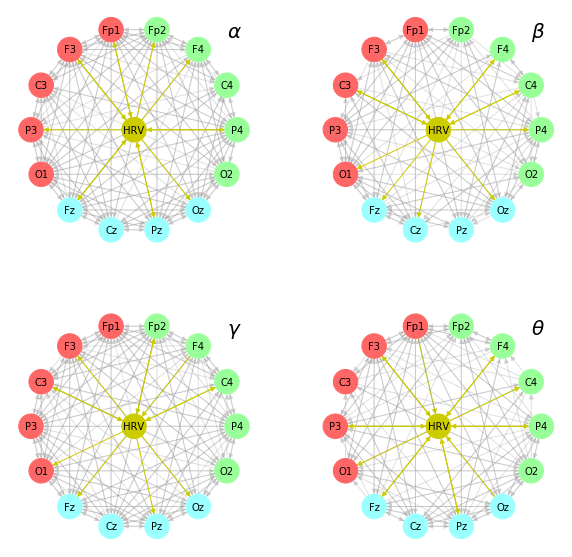

In [3]:
# Prepara figura y axes para las redes
fig, ax = subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
# Para cada banda
for i, banda in enumerate(bandas):
    # Grafica la red
    graficas[banda].draw(ax[i//2][i%2], title='$\{}$'.format(banda))

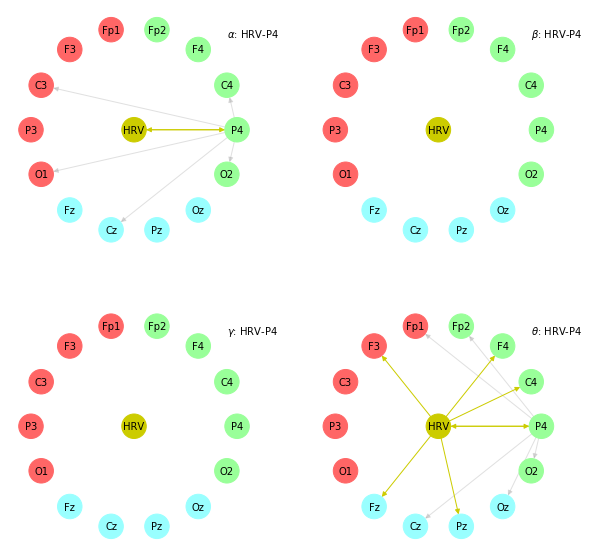

In [4]:
# Muestra vecinos no mutuos de una pareja de nodos conectada bidireccionalmente
Nodo1 = 'HRV'
Nodo2 = 'P4'
# Diccinoario de gráficas por banda
doble = dict()
for banda in bandas:
    doble[banda] = graficas[banda].nonNeighbors(Nodo1, Nodo2)
# Prepara figura y axes para las redes
fig, ax = subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True);
# Para cada banda
for i, banda in enumerate(bandas):
    # Grafica la red
    doble[banda].draw(ax[i//2][i%2], '$\{}$: {}-{}'.format(banda, Nodo1, Nodo2), fontsize=10)